### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [1]:
%pip install missingno

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


#### Lendo os dados da base única de 2015 a 2021

In [2]:
df_accidents = pd.read_csv(
    "../databases/acidentes2015_2021.csv"
)
df_accidents.info()

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_18935/244838934.py:1: DtypeWarning: Columns (7,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235361 entries, 0 to 1235360
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1235361 non-null  float64
 1   pesid                   1235356 non-null  float64
 2   data_inversa            1235361 non-null  object 
 3   dia_semana              1235361 non-null  object 
 4   horario                 1235361 non-null  object 
 5   uf                      1235361 non-null  object 
 6   br                      1233970 non-null  float64
 7   km                      1233970 non-null  object 
 8   municipio               1235361 non-null  object 
 9   causa_acidente          1235361 non-null  object 
 10  tipo_acidente           1235361 non-null  object 
 11  classificacao_acidente  1235359 non-null  object 
 12  fase_dia                1235360 non-null  object 
 13  sentido_via             1235361 non-null  object 
 14  co

#### Verificando os dados faltantes de cada coluna para ter uma visão geral da base

<Axes: >

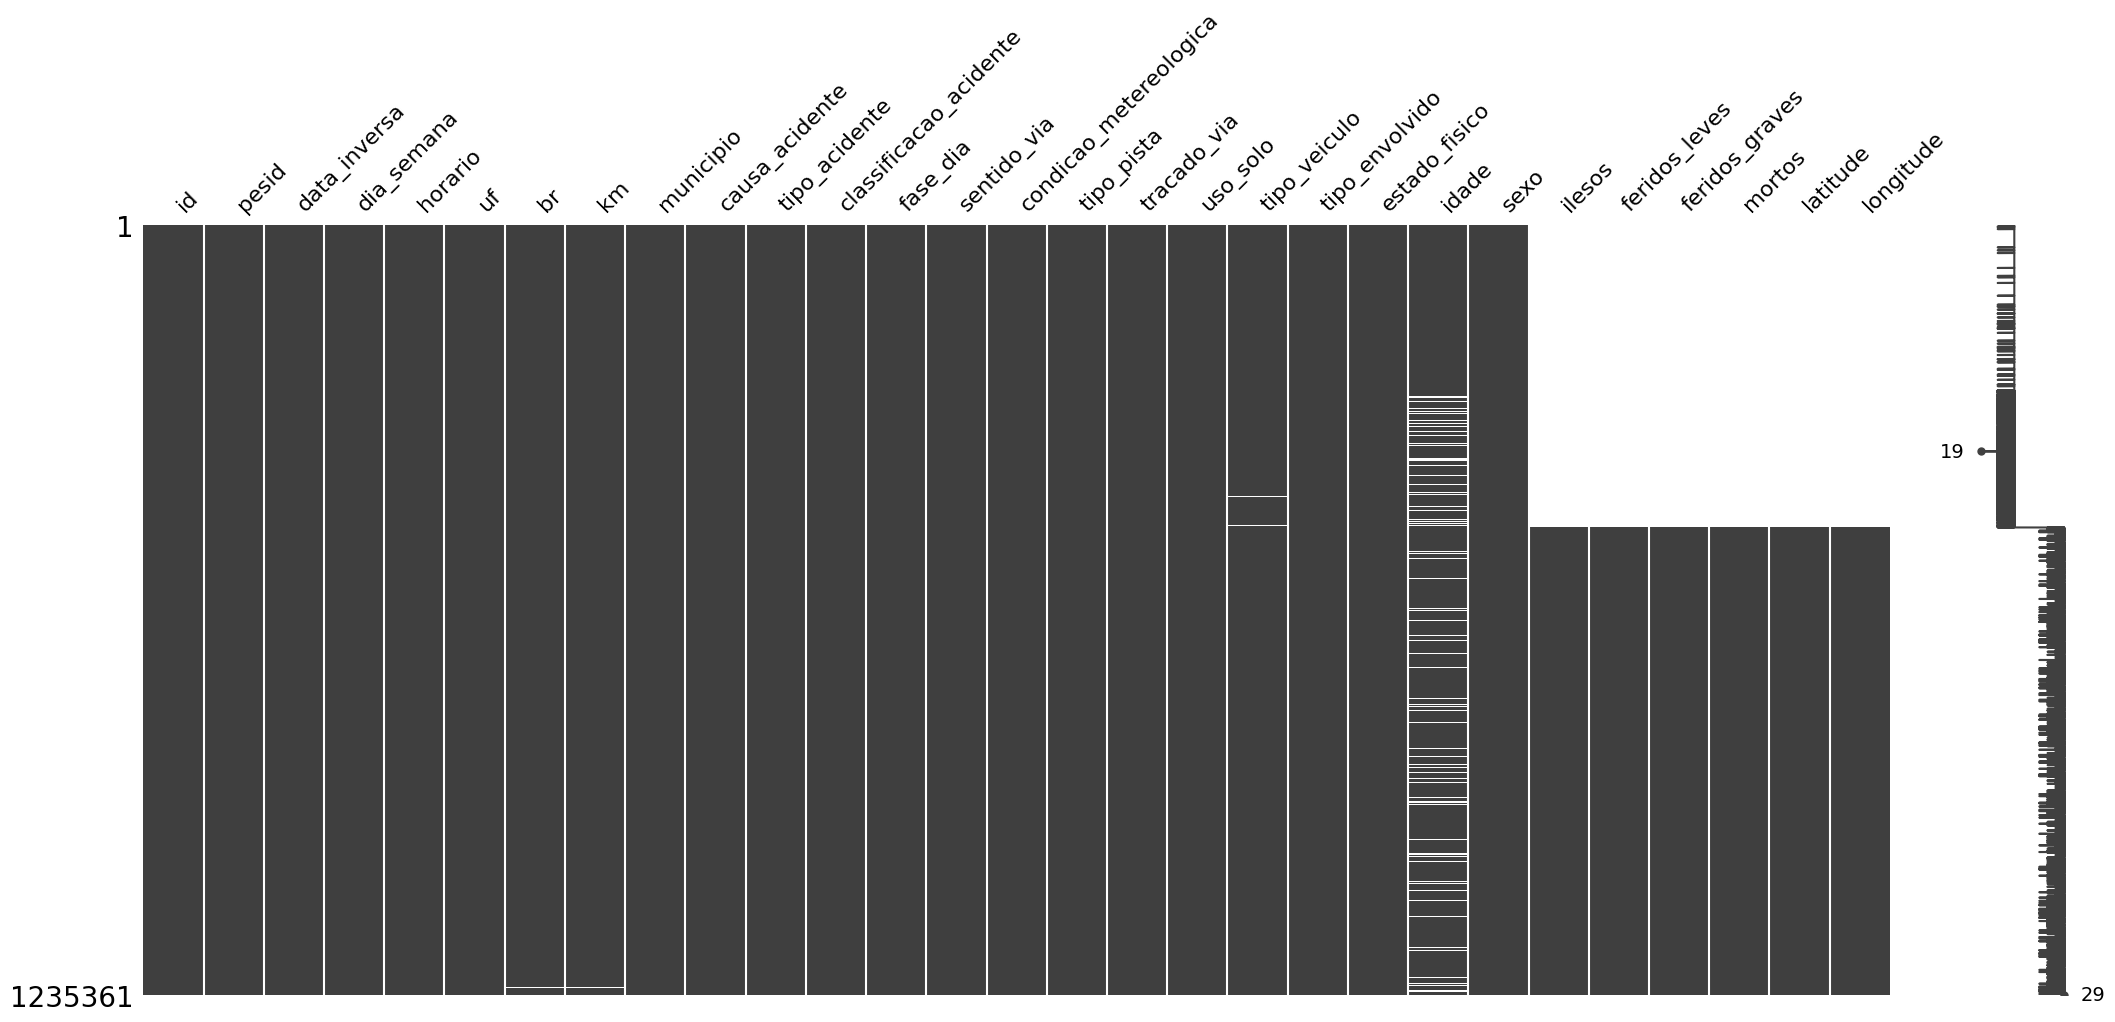

In [3]:
msno.matrix(df=df_accidents)

#### Verificando informações da coluna "br"

In [4]:
df_accidents["br"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1235361 entries, 0 to 1235360
Series name: br
Non-Null Count    Dtype  
--------------    -----  
1233970 non-null  float64
dtypes: float64(1)
memory usage: 9.4 MB


#### Verificando dados estatísticos da coluna "br" antes do tratamento dos dados

In [5]:
df_accidents["br"].describe()

count    1.233970e+06
mean     2.145969e+02
std      1.299661e+02
min      0.000000e+00
25%      1.010000e+02
50%      1.630000e+02
75%      3.240000e+02
max      6.600000e+02
Name: br, dtype: float64

#### Verificando dados faltantes na coluna "br" antes do tratamento

In [6]:
df_accidents["br"].isna().sum()

np.int64(1391)

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "br"

In [7]:
br_column = pd.to_numeric(
    df_accidents["br"], errors="coerce").fillna(0).astype("int")
br_column = br_column.apply(
    lambda data: f'BR-{data}' if data != 0 else "Desconhecido")
df_accidents["br"] = br_column

#### Verificando dados faltantes categorizados como "Desconhecido" na coluna "br"

In [8]:
df_accidents[df_accidents["br"] == "Desconhecido"].shape

(1395, 29)

#### Verificando dados estatísticos da coluna "br" após do tratamento dos dados

In [9]:
df_accidents["br"].describe()

count     1235361
unique        138
top        BR-101
freq       196223
Name: br, dtype: object

#### Salvando os dados em um novo CSV após o tratamento de dados da coluna "br" acima para ter uma base mais limpa

In [10]:
with open("../databases/acidentes2015_2021_tratado_v1.csv", "w") as f:
    df_accidents.to_csv(f, index=False)

#### Gerando gráfico de pizza dos dados para uma análise univariada, com os top 5 rodovias com mais acidentes para uma melhor visualização.

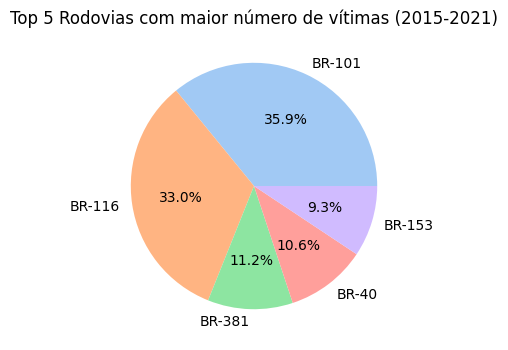

In [11]:
top_n = 5

df_br = df_accidents["br"].value_counts().nlargest(top_n).reset_index()
df_br.columns = ["br", "Frequência"]

plt.figure(figsize=(4, 4))
plt.pie(df_br["Frequência"], labels=df_br["br"],
        autopct="%1.1f%%", colors=sns.color_palette("pastel", len(df_br)))
plt.title(f'Top {top_n} Rodovias com maior número de vítimas (2015-2021)')
plt.show()

#### Verificando informações da coluna "km"

In [12]:
df_accidents["km"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1235361 entries, 0 to 1235360
Series name: km
Non-Null Count    Dtype 
--------------    ----- 
1233970 non-null  object
dtypes: object(1)
memory usage: 9.4+ MB


#### Verificando dados estatísticos da coluna "km" antes do tratamento dos dados

In [13]:
df_accidents["km"].describe()

count     1233970
unique      19831
top             1
freq         3829
Name: km, dtype: object

#### Verificando dados faltantes na coluna "km" antes do tratamento

In [14]:
df_accidents["km"].isna().sum()

np.int64(1391)

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "km"

In [15]:
km_column = pd.to_numeric(
    df_accidents["km"], errors="coerce").fillna(0).astype("int")
km_column = km_column.apply(
    lambda data: f'KM-{data}' if data != 0 else "Desconhecido")
df_accidents["km"] = km_column
df_accidents["km"].head()

0    KM-327
1    KM-327
2    KM-434
3    KM-434
4     KM-64
Name: km, dtype: object

#### Verificando dados faltantes categorizados como "Desconhecido" na coluna "km"

In [16]:
df_accidents[df_accidents["km"] == "Desconhecido"].shape

(485285, 29)

#### Verificando dados estatísticos da coluna "km" após do tratamento dos dados

In [17]:
df_accidents["km"].describe()

count          1235361
unique            1168
top       Desconhecido
freq            485285
Name: km, dtype: object

#### Verificando informações da coluna "data_inversa"

In [18]:
df_accidents["data_inversa"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1235361 entries, 0 to 1235360
Series name: data_inversa
Non-Null Count    Dtype 
--------------    ----- 
1235361 non-null  object
dtypes: object(1)
memory usage: 9.4+ MB


#### Verificando dados estatísticos da coluna "data_inversa" antes do tratamento dos dados

In [19]:
df_accidents["data_inversa"].describe()

count        1235361
unique          2373
top       05/04/2015
freq            1536
Name: data_inversa, dtype: object

#### Verificando a frequência dos valores da coluna "data_inversa" antes do tratamento dos dados

In [20]:
df_accidents["data_inversa"].value_counts()

data_inversa
05/04/2015    1536
14/02/2015    1436
02/04/2015    1364
13/02/2015    1354
2017-12-23    1280
              ... 
2020-03-30     183
2018-05-29     173
2020-03-25     163
2020-03-23     154
2020-03-26     148
Name: count, Length: 2373, dtype: int64

#### Verificando dados faltantes na coluna "data_inversa" antes do tratamento

In [21]:
df_accidents["data_inversa"].isna().sum()

np.int64(0)

#### Padronizando o formato da data do campo data_inversa para dd/MM/yyyy

In [43]:
df_accidents["data_inversa"] = pd.to_datetime(
    df_accidents["data_inversa"], format='mixed', dayfirst=True).dt.strftime('%d/%m/%Y').to_frame()
df_accidents["data_inversa"].value_counts()

data_inversa
05/04/2015    1536
14/02/2015    1436
02/04/2015    1364
13/02/2015    1354
23/12/2017    1280
              ... 
30/03/2020     183
29/05/2018     173
25/03/2020     163
23/03/2020     154
26/03/2020     148
Name: count, Length: 2373, dtype: int64

#### Verificando dados estatísticos da coluna "data_inversa" após do tratamento dos dados

In [28]:
df_accidents["data_inversa"].describe()

count        1235361
unique          2373
top       05/04/2015
freq            1536
Name: data_inversa, dtype: object

#### Criando coluna auxiliar mês para facilitar análise futura

In [99]:
column_name = "mes"
months = {
    "January": "Janeiro",
    "February": "Fevereiro",
    "March": "Março",
    "April": "Abril",
    "May": "Maio",
    "June": "Junho",
    "July": "Julho",
    "August": "Agosto",
    "September": "Setembro",
    "October": "Outubro",
    "November": "Novembro",
    "December": "Dezembro",
}
if column_name in df_accidents.columns:
    df_accidents.pop(column_name)
df_accidents.insert(3, column_name, pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.strftime('%B').map(months))
df_accidents.head()

,id,pesid,data_inversa,mes,dia_semana,horario,uf,br,km,municipio,...,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
0,83298209.0,5085680.0,01/01/2015,Janeiro,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,...,Condutor,Ileso,31.0,Feminino,NaN,NaN,NaN,NaN,NaN,NaN
1,83298209.0,5085683.0,01/01/2015,Janeiro,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,...,Condutor,Ileso,54.0,Masculino,NaN,NaN,NaN,NaN,NaN,NaN
2,83298218.0,5085748.0,01/01/2015,Janeiro,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,...,Condutor,Ileso,45.0,Masculino,NaN,NaN,NaN,NaN,NaN,NaN
3,83298218.0,5085750.0,01/01/2015,Janeiro,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,...,Passageiro,Ferido Leve,52.0,Feminino,NaN,NaN,NaN,NaN,NaN,NaN
4,83298220.0,5090792.0,01/01/2015,Janeiro,Quinta,01:45:00,RJ,BR-40,KM-64,PETROPOLIS,...,Condutor,Ileso,33.0,Feminino,NaN,NaN,NaN,NaN,NaN,NaN


#### Verificando informações da coluna mes após sua inserção

In [100]:
df_accidents["mes"].value_counts()

mes
Janeiro      124018
Março        111120
Maio         109401
Dezembro     108934
Fevereiro    108681
Abril        107251
Junho        106435
Julho         94848
Outubro       93645
Agosto        91021
Setembro      90067
Novembro      89940
Name: count, dtype: int64

#### Criando coluna auxiliar ano para facilitar análise futura

In [102]:
column_name = "ano"
if column_name in df_accidents.columns:
    df_accidents.pop(column_name)
df_accidents.insert(4, column_name, pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.year)
df_accidents.tail()

,id,pesid,data_inversa,mes,ano,dia_semana,horario,uf,br,km,...,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
1235356,374024.0,833912.0,28/06/2021,Junho,2021,segunda-feira,10:50:00,PR,BR-277,KM-576,...,Condutor,Ileso,24.0,Masculino,1.0,0.0,0.0,0.0,"-24,98692731","-53,33030208"
1235357,374224.0,834254.0,13/06/2021,Junho,2021,domingo,02:50:00,SP,BR-116,Desconhecido,...,Condutor,Lesões Leves,40.0,Masculino,0.0,1.0,0.0,0.0,"-22,99497994","-45,48951403"
1235358,374239.0,834287.0,02/06/2021,Junho,2021,quarta-feira,08:45:00,RN,BR-101,KM-85,...,Condutor,Lesões Graves,NaN,Masculino,0.0,0.0,1.0,0.0,"-5,777664","-35,24937"
1235359,374239.0,834286.0,02/06/2021,Junho,2021,quarta-feira,08:45:00,RN,BR-101,KM-85,...,Condutor,Ileso,45.0,Masculino,1.0,0.0,0.0,0.0,"-5,777664","-35,24937"
1235360,374253.0,834310.0,01/01/2021,Janeiro,2021,sexta-feira,17:40:00,RN,BR-101,Desconhecido,...,Condutor,Lesões Graves,34.0,Masculino,0.0,0.0,1.0,0.0,"-5,74071896","-35,29021064"


#### Verificando informações da coluna ano após sua inserção

In [103]:
df_accidents["ano"].value_counts()

ano
2015    269052
2016    216261
2017    204395
2018    164802
2019    162273
2020    147642
2021     70936
Name: count, dtype: int64

#### Salvando os dados em um novo CSV após o tratamento de dados da coluna "km" acima para ter uma base mais limpa

In [ ]:
with open("../databases/acidentes2015_2021_tratado_v1.csv", "w") as f:
    df_accidents.to_csv(f, index=False)